# <font color='#a103fc'><center>Plotting</center></font>

## <font color='#6900bf'>__about plotting__</font>

Plotting is one of the essential parts of the data analysis and can you help with any part of it. Be it just fast visualisation of a dataset and its parts, or a more complex cross plots of multiple features to find correlations. I will divide this notebook into individual plot styles with short commentary and showing for what they are most useful for. Our main library is __Seaborn__ which is built upon __Matplotlib__.


which plots we will cover for now:

<font color='#6900bf'>__categorical__</font>
* barplot
* boxplot

<font color='#6900bf'>__statistical relationships__</font>
* lineplot
* scatterplot

<font color='#6900bf'>__distribution__</font>
* distplot (histogram)
* pairplots


We will need some datasets to train on and import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

datasets_path_clean = ".jupyter\\datasets\\cleaned\\" # you may need to change this path for datasets to load
datasets_path_raw = ".jupyter\\datasets\\raw\\"


shelter_df = pd.read_csv(datasets_path_clean + "shelter_outcomes.csv") # categorical oriented dataset
crashes_df = pd.read_csv(datasets_path_raw + "airplane_crashes.csv") # quantitative oriented dataset
insur_df = pd.read_csv(datasets_path_raw + "insurance.csv") # quantitative oriented dataset
emision_df = pd.read_csv(datasets_path_raw + "Canada_emitions.csv") # quantitative oriented dataset

### <font color='#6900bf'>Prepare your dataframe</font>

before you start, it´s always good to inspect you data. Look if it is clean, if there are right data types you need, if there are any modifications that could make your work easier. Taking your time in the beginning can save you a lot of trouble and time in the long run. You might start to change your dataset on the fly as you do it, few hours comes by and than you notice you made a few modifications there and there and in the end, its one huge mess.<br><br> 
So, rather look at your dataset for a while, think in advance what you will need and what might help you, make all the needed changes at the start so you can only focus on plotting or any other task you might need. I will show you what i mean:

In [182]:
sns.set(rc={'figure.figsize':(14,6)}) # setting a figure (window size for plotting)

shelter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78256 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   out_age_in_weeks  78256 non-null  int64         
 8   name              78256 non-null  object        
 9   outcome_subtype   78256 non-null  object        
 10  outcome_type      78256 non-null  object        
 11  sex_upon_outcome  78256 non-null  object        
 12  birth_year        78256 non-null  int64         
 13  outcome_year      78256 non-null  int64         
dtypes: datetime64[ns](2), 

In [3]:
shelter_df.sample(5)

,Unnamed: 0,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,out_age_in_weeks,name,outcome_subtype,outcome_type,sex_upon_outcome
38054,38054,3 years,A709334,Cat,Domestic Shorthair Mix,Orange Tabby,2012-08-07 00:00:00,2015-08-08 09:00:00,156,*Larry,SCRP,Transfer,Neutered Male
25845,25845,2 months,A696801,Dog,Labrador Retriever Mix,Chocolate/White,2014-12-12 00:00:00,2015-02-16 17:38:00,8,Moose,none,Adoption,Neutered Male
51357,51357,4 years,A713755,Dog,Catahoula Mix,Black/Blue Merle,2011-10-12 00:00:00,2015-11-09 12:45:00,208,*Winston,Foster,Adoption,Neutered Male
30742,30742,2 months,A749693,Cat,Domestic Shorthair Mix,Brown Tabby,2017-04-16 00:00:00,2017-06-21 11:02:00,8,*Penny,Foster,Adoption,Spayed Female
36962,36962,5 months,A758176,Cat,Domestic Shorthair Mix,Black,2017-04-19 00:00:00,2017-10-05 07:45:00,21,*Sweetie,Partner,Transfer,Intact Female


datetime column - it is a timestamp of a resolved outcome<br>

So, as i saved the file, new index column was created by default, so we will just delete it. If you would like to avoid it, you can save the file with __index=False__ parameter to avoid my mistake. Then, we want to change the data type of date_of_birth and datetime from object to datetime. That would be from cleaning all. <br> <br>
About new features. I will create new column for years of birth and years of outcome, as I know I will be using them a lot here. That should be all for features, for some specific axis we can always extract new Series based upon information that is provided here.

there are almost 80k entries, so we will need to aggregate our data into specific groups to make some clear plottings

In [4]:
shelter_df.drop(["Unnamed: 0"], axis=1, inplace=True) # droping old index column

shelter_df["date_of_birth"] = pd.to_datetime(shelter_df["date_of_birth"]) # changing types
shelter_df["datetime"] = pd.to_datetime(shelter_df["datetime"])

shelter_df["birth_year"] = shelter_df["date_of_birth"].dt.year # adding new columns, extracting years for easier work
shelter_df["outcome_year"] = shelter_df["datetime"].dt.year

In [5]:
shelter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78256 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   out_age_in_weeks  78256 non-null  int64         
 8   name              78256 non-null  object        
 9   outcome_subtype   78256 non-null  object        
 10  outcome_type      78256 non-null  object        
 11  sex_upon_outcome  78256 non-null  object        
 12  birth_year        78256 non-null  int64         
 13  outcome_year      78256 non-null  int64         
dtypes: datetime64[ns](2), 

In [6]:
animal_types = shelter_df.groupby("animal_type") # we will often want to visualize data for specific animal types

Now for the aiplane crashes dataset

In [7]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

Ok, I want to make Date into datetime format, and change Time (as it has some NaN too) into Decades. I will work with in a bigger timeframe and I do not plan on analyzing it by hour. There are many flight number NaN and we will not use it in calculations, so we will elave it at object state

In [8]:
import math

# function for ceiling the number to decades
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

crashes_df["Date"] = pd.to_datetime(crashes_df["Date"])
crashes_df.rename(columns=({"Time":"Decade"}), inplace=True) # changing time column into decades
crashes_df["Decade"] = (crashes_df["Date"].dt.year.apply(lambda x: roundup(x))) # applying the change
crashes_df.sample(3)

,Date,Decade,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
3130,1981-10-06,1990,"Moerdijk, Netherlands",NLM (Nederlandse Luchtvaart Maatschappij),HN431,Rotterdam - Eindhoven - Hamburgh,Fokker F-28 Fellowship 4000,PH-CHI,11141,17.0,13.0,4.0,17.0,13.0,4.0,0.0,The aircraft entered an area of severe turbule...
2960,1978-08-30,1980,"Las Vegas, Nevada",Las Vegas Airlines,NaN,"Las Vegas, NV - Santa Ana, CA",Piper PA-31-350 Chieftain,N44LV,NaN,10.0,9.0,1.0,10.0,9.0,1.0,0.0,Crashed on takeoff. Down elevator control stop...
820,1945-11-07,1950,"Near Grants, New Mexico",National Skyway Freight Co.,NaN,Alberquerque -,Budd RB-1 Conestoga,NaN,NaN,3.0,0.0,3.0,1.0,0.0,1.0,0.0,"After refueling in Alberquerque, the plane, ca..."


### <font color='#6900bf'>Choosing the right plot</font>

Plots do not change only in their visualization, different plots may have different set of parameters and are optimised for a specific task. What you may puzzle over how to plot in one type of plot, in the other one is done almost in an instat (yup, I´m talking from experience). So, before you start on your own work, make sure you have at least basic understanding of the fundamental plot types and when you are stuck, you can try to search for better suited one.

<font color='#6900bf'>essential functions and parameters</font>
Your standard plot code will start with __sns.plotname()__, as plotname you will insert the name of the plot you will want to use and according to the plot type you will than insert specific parameters, I will show you the most common ones, more specific ones we will do as we will progress:

__data__ - you will insert you data in this parameter<br>
__x__ - x axis, mostly for cathegorical types or time related ones<br>
__y__ - y axis<br>
__hue__ - insert column with variables you want to group on and plot

<br>

## <font color='#6900bf'><center>barplot</center></font>

### <font color='#6900bf'>__usage__</font>

Barplots are perfect for comparing numbers, frequency or many other measures (like sum or mean) for discrete data. Bar charts are heavily used for their simplicity and easy to understand representation. You can use them as horizontal/vertical, use percentage with the middle line at 0, grouped barcharts etc. So, lets try some of them out

Text(0.5, 1.0, 'mean age of animals on outcome in weeks')

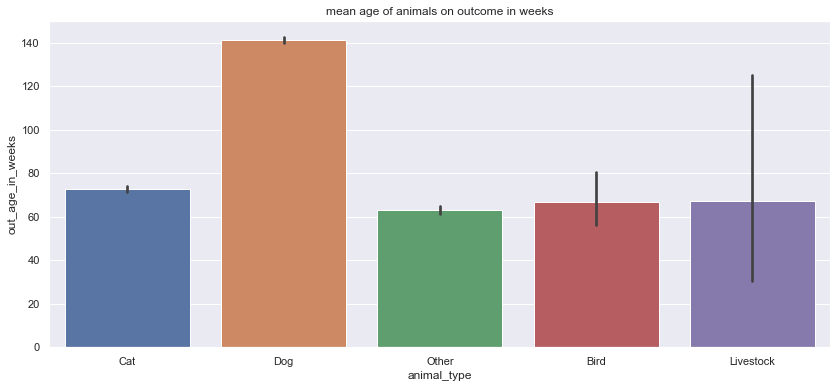

In [9]:
sns.barplot(data=shelter_df, x="animal_type", y="out_age_in_weeks")
plt.title("mean age of animals on outcome in weeks") # I find it easier setting title through plt like this

those black lines are confident interval. if you do not want to show them, you can add parameter __ci=False__

now, lets plot top 10 breeds for cats that were in the shelter

In [10]:
breed_df = shelter_df[shelter_df["animal_type"]=="Cat"].groupby("breed", as_index=False).agg("count")
breed_df = breed_df[["breed", "animal_id"]]
breed_df.sort_values(by="animal_id", ascending=False, inplace=True)
breed_df = breed_df[0:10]

what does each line of code above mean:

1 - selecting only Cats, than group by breed and count all values for each breed<br>
2 - leaving only breed and animal_id (animal id serves as count here, as every cat has its own id)<br>
3 - sorting from the most occurences<br>
4 - leaving only top 10 breed counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

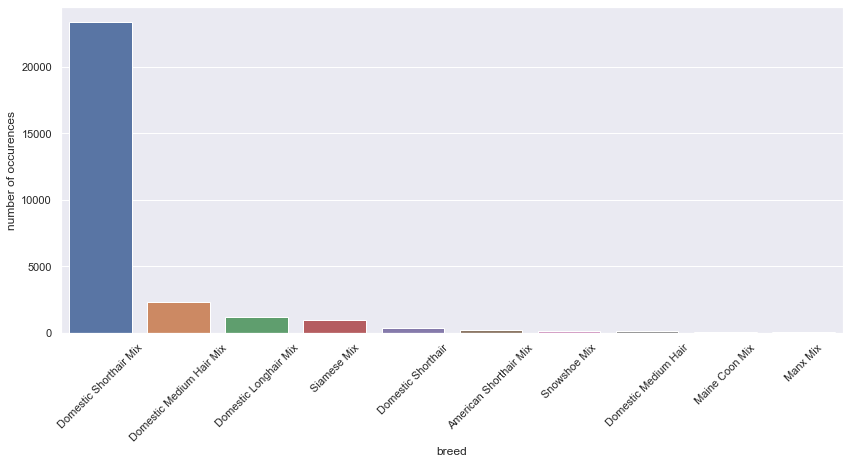

In [11]:
sns.barplot(data=breed_df, x="breed", y="animal_id")
plt.ylabel("number of occurences") # using standard plt to set y label
plt.xticks(rotation=45) # again using standard plt to rotate the x values (we could not read it otherwise)

well, the top breed mix takes huge amount of space so we cant compare the rest that well, you could take out the frist one to see the more clerly the rest. But to not plot tha same thing again, lets try it again with dogs

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

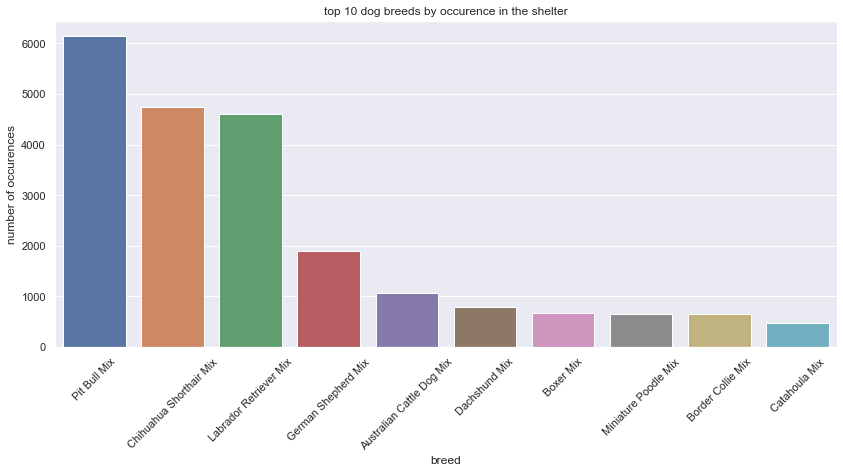

In [12]:
breed_df = shelter_df[shelter_df["animal_type"]=="Dog"].groupby("breed", as_index=False).agg("count")
breed_df = breed_df[["breed", "animal_id"]].sort_values(by="animal_id", ascending=False)
breed_df = breed_df[0:10]

sns.barplot(data=breed_df, x="breed", y="animal_id")
plt.title("top 10 dog breeds by occurence in the shelter")
plt.ylabel("number of occurences")
plt.xticks(rotation=45)

for specific tasks, we can use one of special kind of bar plots, we will try out a countplot. Countplot is very easy and intuitive to use, as the name suggest, you can show categorical data and their comparison even in nested variables

Text(0.5, 1.0, 'number of outcomes each year by the animal types')

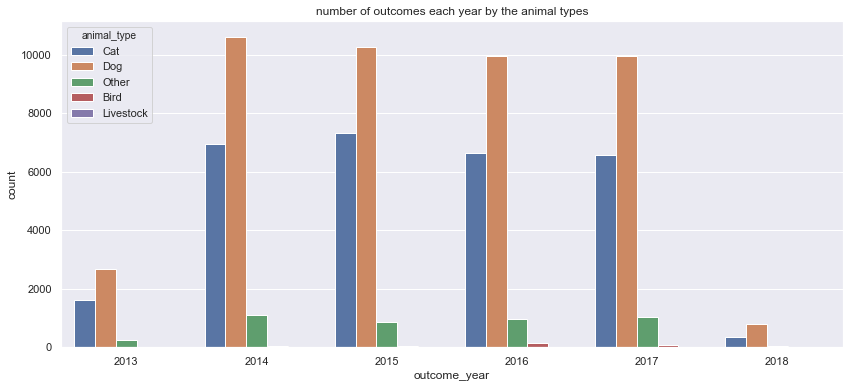

In [13]:
sns.countplot(data=shelter_df, x="outcome_year", hue="animal_type")
plt.title("number of outcomes each year by the animal types")

## <font color='#6900bf'><center>boxplot</center></font>

### <font color='#6900bf'>__usage__</font>

Its main potential is in showing distribution of quantitative data. Box shows quartiles of dataset (line inside shows mean),those black lines (whiskers) show almost rest of the distribution. Why almost ? Because of those black dots, which represents the determined outliers

Text(0.5, 1.0, 'distribution of fatalities in aircraft crashes by decades')

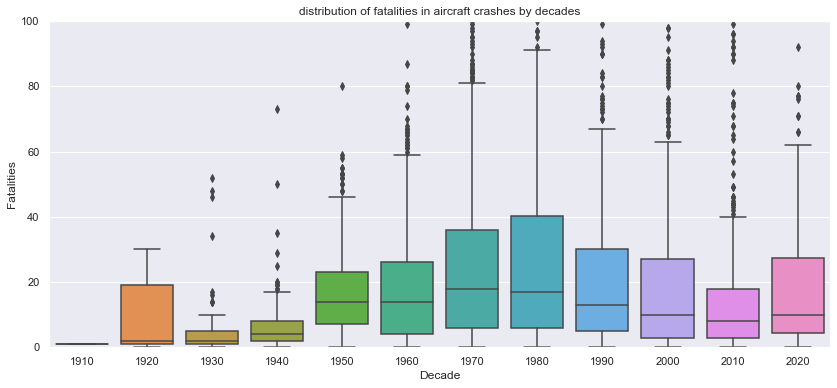

In [14]:
sns.boxplot(data=crashes_df, x="Decade", y="Fatalities")
plt.ylim(0,100) # this sets the y axis range, try to delete it and rerun - the outliers will make chart almost unreadable
plt.title("distribution of fatalities in aircraft crashes by decades")

Text(0.5, 1.0, 'Distribution of animal ages upon resolved outcome in weeks')

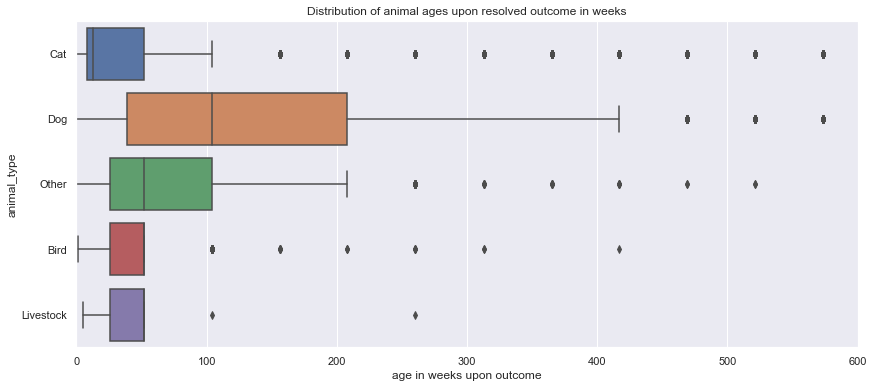

In [15]:
sns.boxplot(data=shelter_df, x="out_age_in_weeks", y="animal_type", orient="h") # if its conveniet, we can make horizontal one
plt.xlabel("age in weeks upon outcome")
plt.xlim(0,600)
plt.title("Distribution of animal ages upon resolved outcome in weeks")

I should note, that the original data was divided into weeks, month and years, that is why above 1 year its so precisely distributed, its rounded to years, but at least we can visualize it this way now

## <font color='#6900bf'><center>lineplot</center></font>

### <font color='#6900bf'>__usage__</font>

Shows relationship between two variables, you can create further subsets based upon __hue, size__ and __style__ parameters. Here again a confident interval is plotted, if you do not want it, you can just add __ci=False__ parameter

Text(0.5, 1.0, 'Airplane crash fatalities by decade')

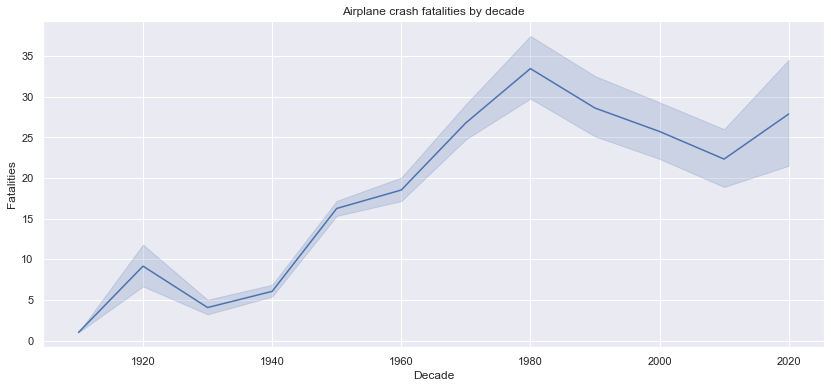

In [16]:
sns.lineplot(data=crashes_df, x="Decade", y="Fatalities")
plt.title("Airplane crash fatalities by decade")

if you want to plot more variables, either you can do it through __hue__ parameter if its in 1 column and the aggregations will be done under the hood and if you need to plot variables that each has its own column (feature), than you can plot them individualy. It depends, sometimes its easier this way, other times you can make separate subset to plot it. It si not an elegant way, but it will do its work

Text(0.5, 1.0, 'Airplanes crash fatalities by decades')

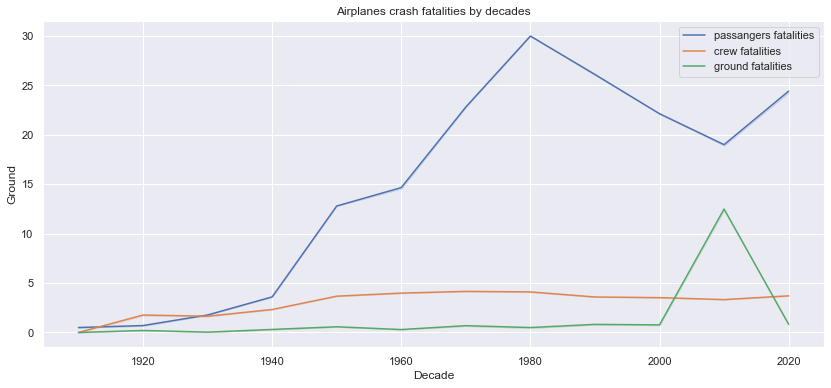

In [17]:
sns.lineplot(data=crashes_df, x="Decade", y="Fatalities Passangers", ci=False)
sns.lineplot(data=crashes_df, x="Decade", y="Fatalities Crew", ci=False)
sns.lineplot(data=crashes_df, x="Decade", y="Ground", ci=False)

# manually setting the legend for multiple plots
plt.legend(["passangers fatalities", "crew fatalities", "ground fatalities"])
plt.title("Airplanes crash fatalities by decades")

Text(0.5, 1.0, 'medical costs billed by health insurance based upon smoking by age')

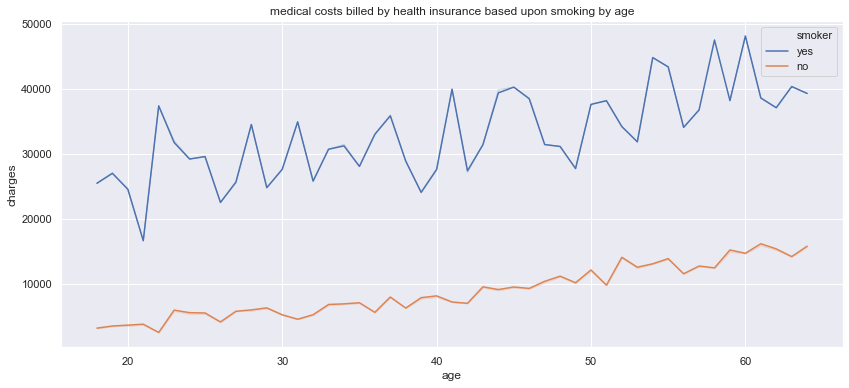

In [18]:
sns.lineplot(data=insur_df, x="age", y="charges" ,hue="smoker", ci=False)
plt.title("medical costs billed by health insurance based upon smoking by age")

## <font color='#6900bf'><center>scatterplot</center></font>

### <font color='#6900bf'>__usage__</font>

scatter plot is widely used for correlations. It shows occurences based upon x and y axis, you can hue on more variables. Can be used again on numeric and categorical data.

Text(0.5, 1.0, 'Airplane fatalities by dates')

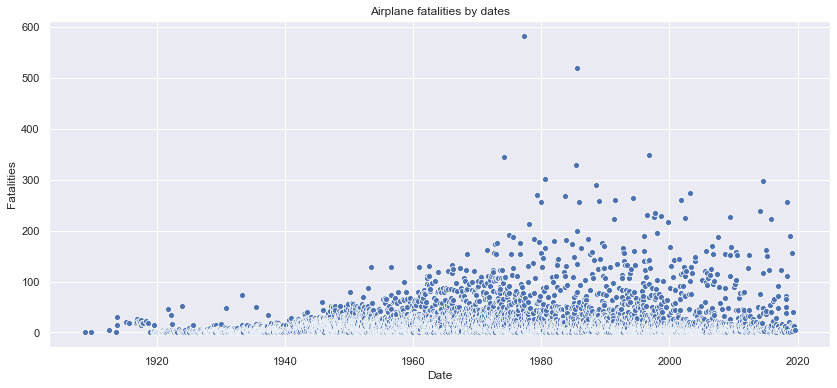

In [192]:
sns.scatterplot(data=crashes_df, x="Date", y="Fatalities")
plt.title("Airplane fatalities by dates")

__size__ is another useful parameter, which will change size (can be used with hue) to better show the needed informations. Lets try to use our aircraft crashes database and look at how many fatalities are there against number of people aboard

Text(0.5, 1.0, 'Fatalities based upon number of people aboard')

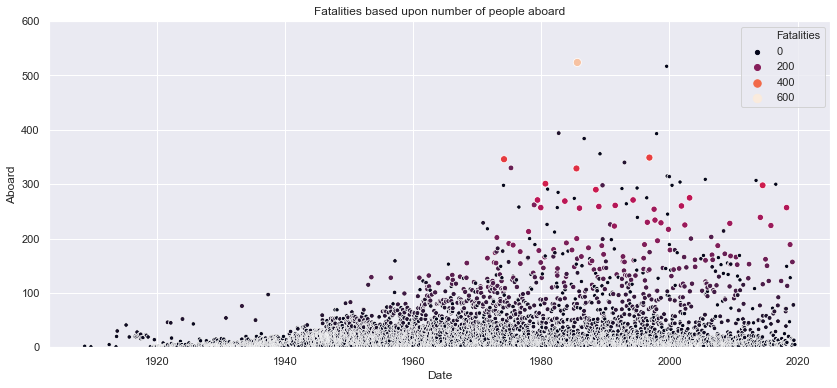

In [19]:
sns.scatterplot(data=crashes_df, x="Date", y="Aboard", hue="Fatalities", size="Fatalities", palette="rocket")
plt.ylim(0,600)
plt.title("Fatalities based upon number of people aboard")

Of course there will be trend that higher number people aboard means more fatalities most of the time, but we can clearly see those flights where there were minimal fatalities

Text(0.5, 1.0, 'CO2 emissions on fuel consumption by Engine size on highway')

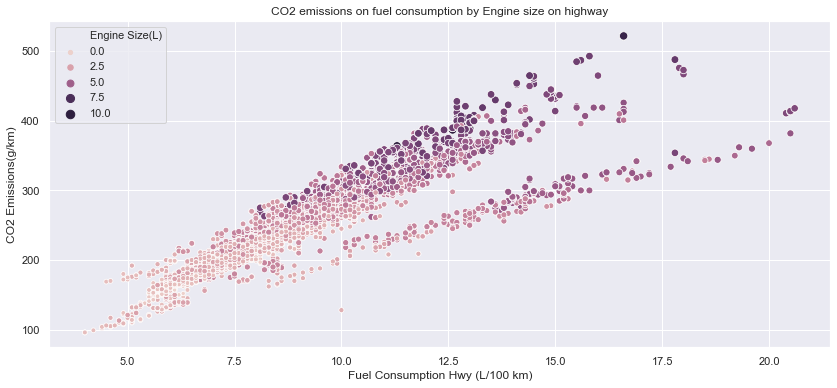

In [193]:
sns.scatterplot(data=emision_df, x="Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)", 
                hue="Engine Size(L)", size="Engine Size(L)")
plt.title("CO2 emissions on fuel consumption by Engine size on highway")

You can use it on categorical data, generally there are better types for this job, but you may find some place where it might actully be worth it. Plus if there is a lot of data, these can get messy:

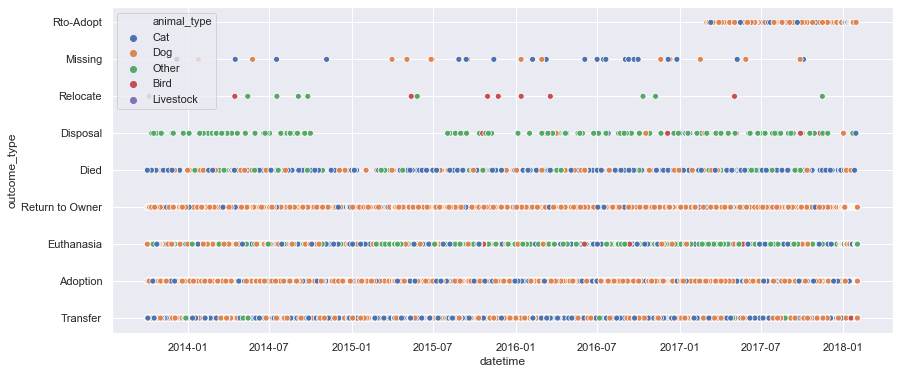

In [207]:
sns.scatterplot(data=shelter_df, x="datetime", y="outcome_type", hue="animal_type")

You can read some information from it, for example that for disposal outcome, its the Other animal type domain. On the other hand, return to owner is mostly filled with dogs. But to be honest, there are so many points cramped up there, that this might be very bad misinterpretation and it would be wise to use some better suited plot

## <font color='#6900bf'><center>distplot / historgram</center></font>

### <font color='#6900bf'>__usage__</font>

distplot show the univariate distribution. It shows a standard matplotlib histogram function with seaborns kdeplot, which as name suggest, plots Kernel Density Estimate. You can fit many scipy.stats distributions for further functionality.

example of few handy parameters:
* __hist__ - switching to False will not plot histogram part
* __kde__ - switching to False will not plot kdernel density estimate part
* __rug__ - whether to draw rugplot - miniature marks at the bottom of axis of data, to better show distribution
* __fit__ - you can fit any type of distribution, for example from scipy.stats

(1900, 2020)

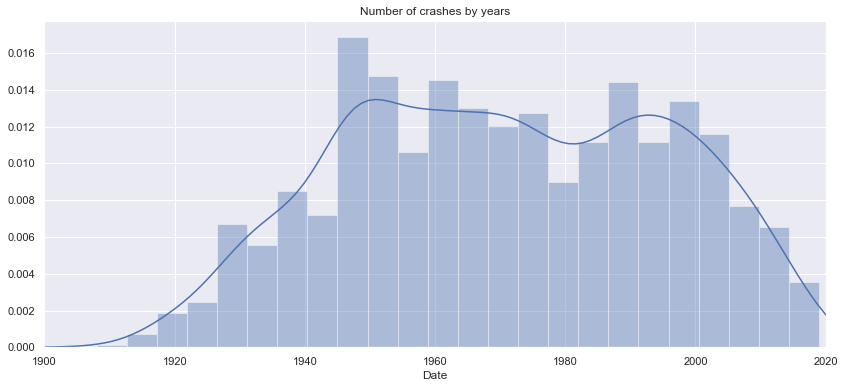

In [37]:
sns.distplot(crashes_df["Date"].dt.year)
plt.title("Number of crashes by years")
plt.xlim(1900,2020)

Text(0.5, 1.0, 'insurance company clients by age')

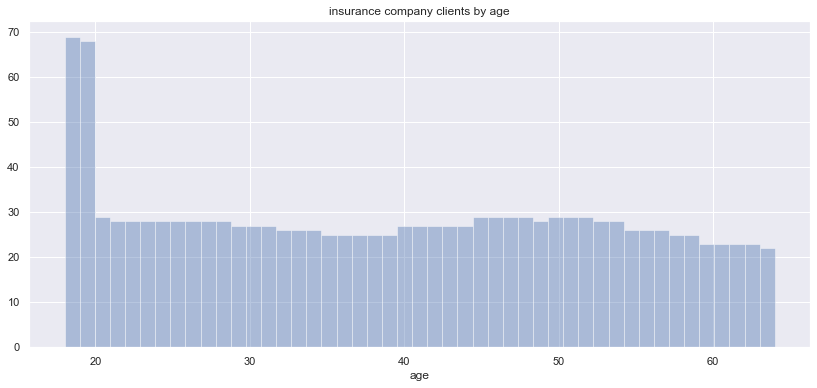

In [65]:
age_gap = insur_df["age"].max() - insur_df["age"].min() +1

sns.distplot(insur_df["age"], kde=False, bins=age_gap)
plt.title("insurance company clients by age")

Text(0.5, 1.0, 'distribution of engine size - showing few other options')

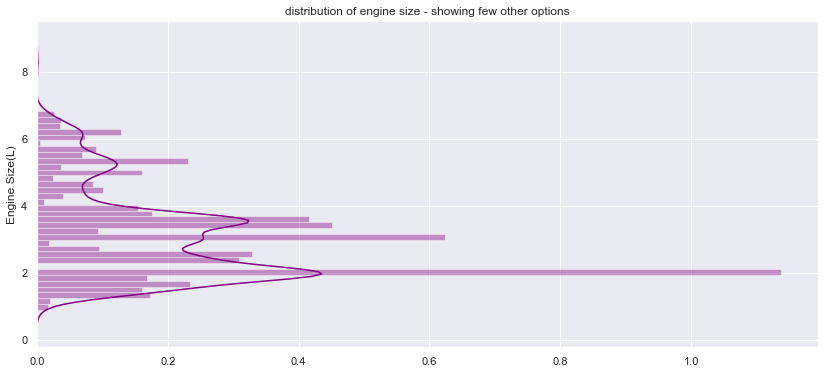

In [86]:
sns.distplot(emision_df["Engine Size(L)"], color="Purple", vertical=True)
plt.title("distribution of engine size - showing few other options")

<font color='#6900bf'><center>__Scipy__</center></font> is another heavily used library used for scientific computing, as example you can use its many stats functions for these plots

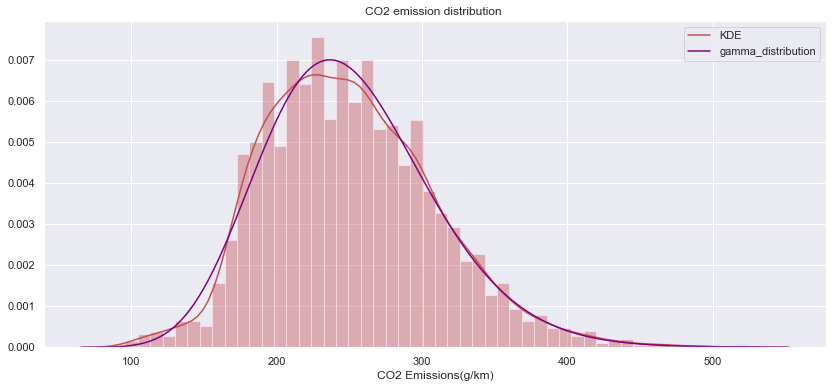

In [208]:
from scipy import stats

sns.distplot(emision_df["CO2 Emissions(g/km)"], color="r", fit=stats.gamma,
            kde_kws={"label":"KDE"}, # setting kde label
            fit_kws={"label":"gamma_distribution", "color":"purple"}) # setting gamma dist parameter for plot
plt.title("CO2 emission distribution ")
plt.legend() # I needed to call this, otherwise label for gamma distribution wont show up

Text(0.5, 1.0, 'insurance company charges distribution expressed in KDE')

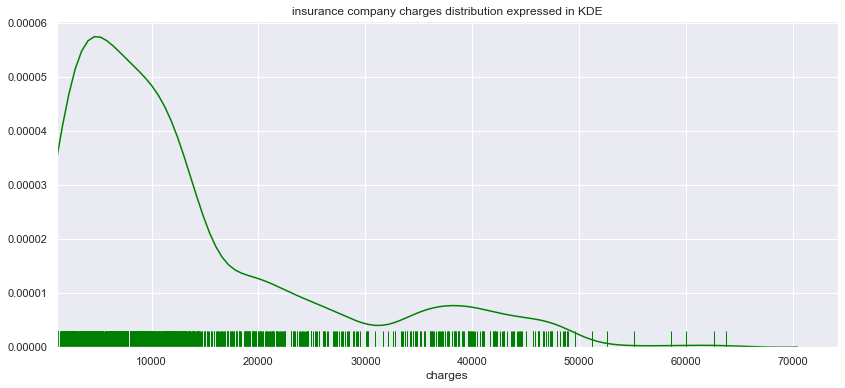

In [105]:
sns.distplot(insur_df["charges"], rug=True, color="green", hist=False)
plt.xlim(insur_df["charges"].min(),) # set the x axis to start from the smallest amount
plt.title("insurance company charges distribution expressed in KDE")

## <font color='#6900bf'><center>pairplot</center></font>

### <font color='#6900bf'>__usage__</font>

As self explanatory as it can be, this plot shows relationship between two variables. This plot creates grid fo axis based upon number of features that is provided. The diagonal shows univariate distribution for that specific column and the rest shares the x and y axis. This plot is very useful for fast and easy analysis of the data (at least for 5 features or less, more of them makes it very hard to read), especially for checking correlations.

example of few handy parameters:
* __vars__ - you can use this parameter to specify columns, or you can select it in data parameter
* __kind__ - if you want "scatter" or "reg" plot
* __height__ - height of each facet
* __dropna__ - if set to True, than it drops the NA / NaN data before plot

__There are many ways you can use pairplots. One of many examples may be:__

Insurance dataframe - is there any relation between age, bmi or charges based upon number of children ? Again, if it makes sense or not is not the point here, but you can try a lot of these kind of plots in a few minutes and get a great grasp on the data

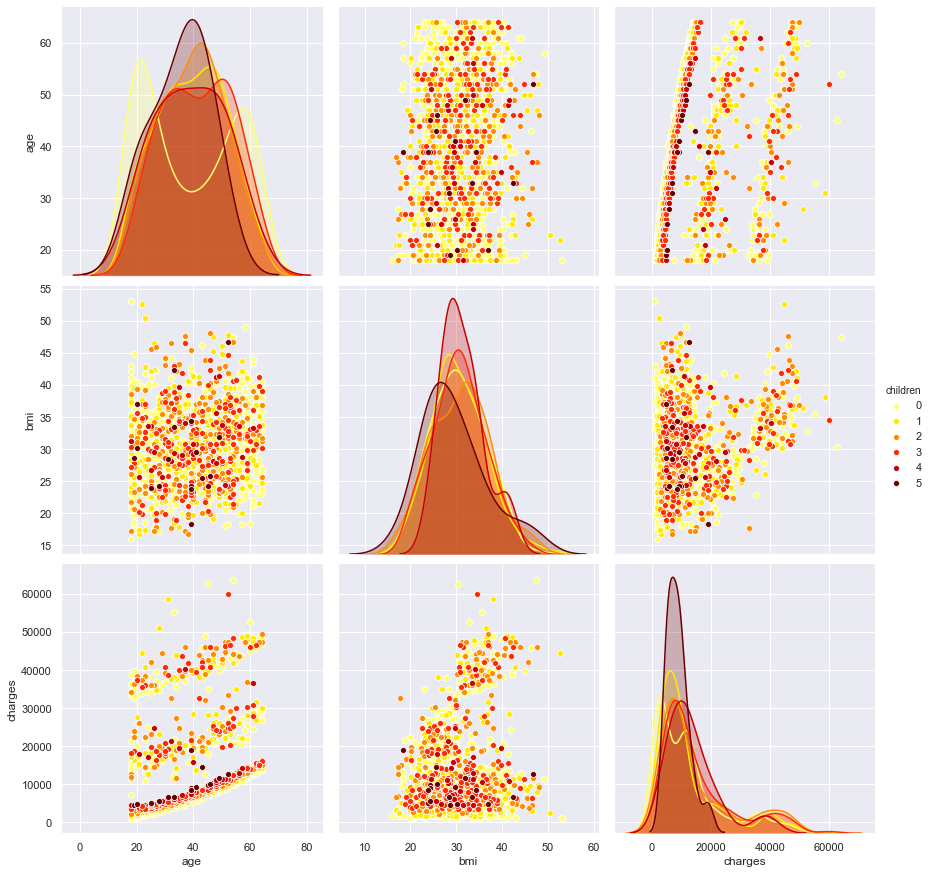

In [171]:
sns.pairplot(insur_df, vars=["age", "bmi", "charges"], hue="children", height=4, palette="hot_r")
# pallete can be very usefull for visualitsation:
# different colors for categorical data, or (like this one) by shade for better quantitave view

What can we deduct ? Bmi and charges, not much. Age and charges, there are evidently 3 lines, even thought we can see that people with more children tend to have slightly bigger charges, there seems to be some other factor that plays bigger role, lets find it.

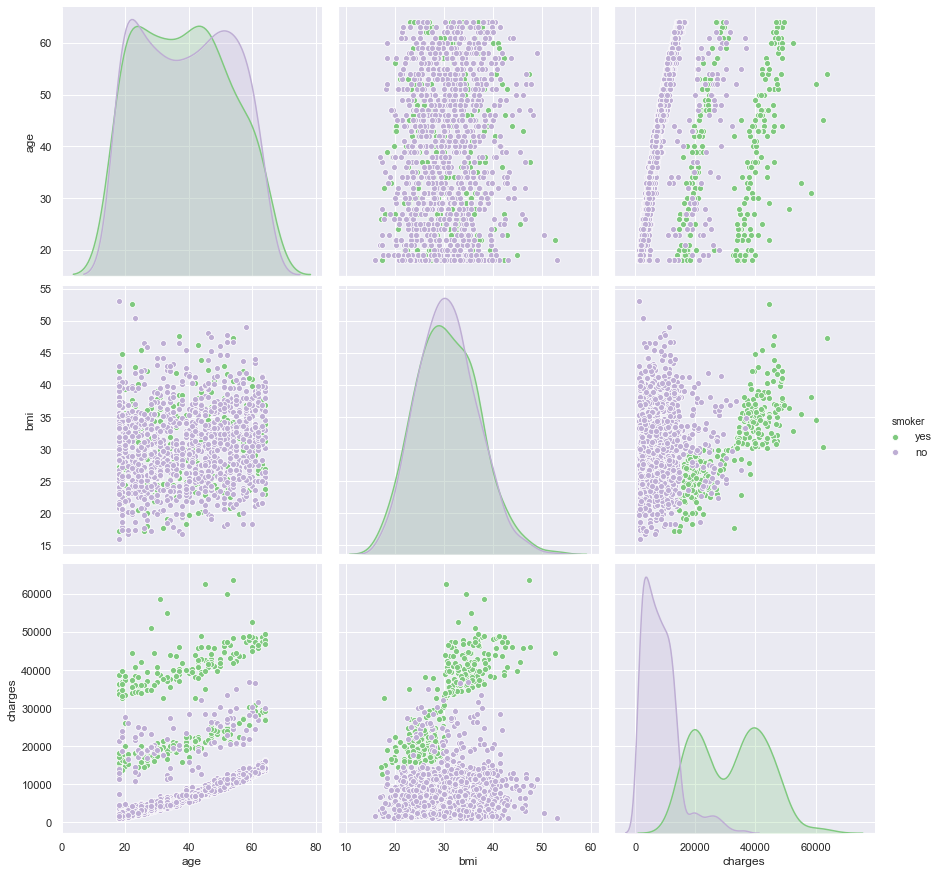

In [177]:
sns.pairplot(insur_df, vars=["age", "bmi", "charges"], hue="smoker", height=4, palette="Accent")

No new discoveries here - this clearly confirms the difference of charges for smokers and non-smokers. You can dig deeper to find more for the relation in the "middle line", but I will leave it here. I just wanted to show the power of pairplots, as you can see, you can try different features, different hue and then choose pallete based on the visualisation you plan to achieve and this alone will tell you a lot about your dataset.

C:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pairplots for fuel consumption on highway/city and CO2 emissions')

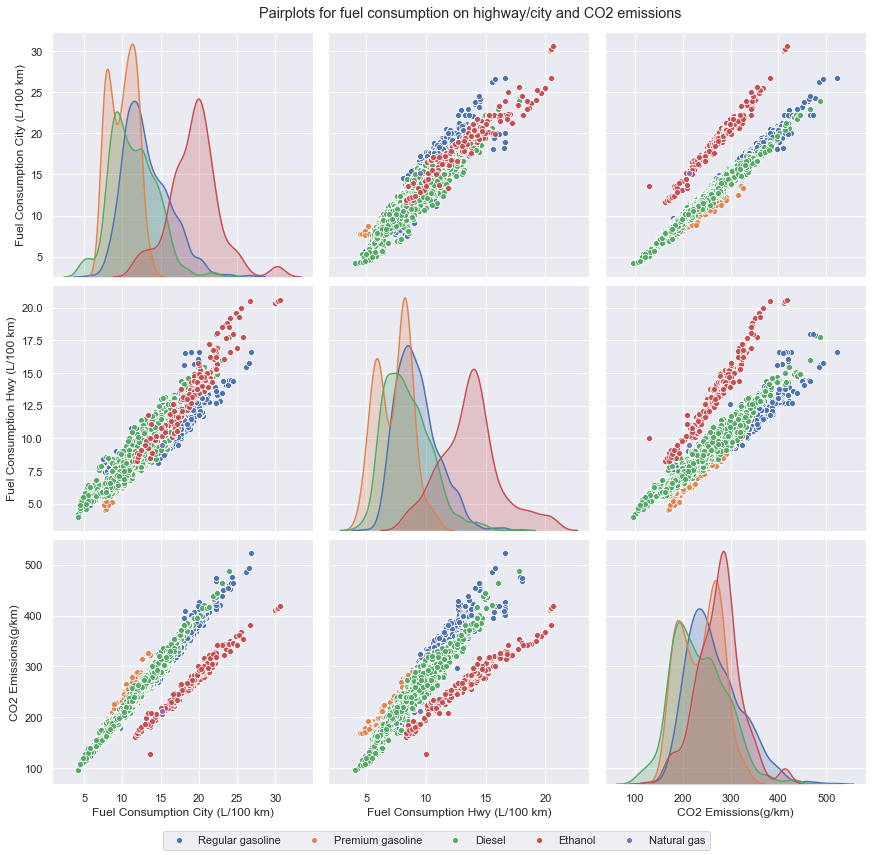

In [178]:
# I will explain the code after the plot

engine_labels = ["Regular gasoline", "Premium gasoline", "Diesel", "Ethanol", "Natural gas"]

g=sns.pairplot(emision_df, vars=["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"],
            height=4, hue="Fuel Type")
g._legend.remove()
g.fig.legend(labels=engine_labels, loc="lower center", ncol=5)
g.fig.subplots_adjust(top=0.95, bottom=0.08)
g.fig.suptitle("Pairplots for fuel consumption on highway/city and CO2 emissions")

We can assign the figure to an variable, this way we can then use its properties. As you can see, we accesed ___legend__ attribute and removed it (It would be better to change it in the dataset in the first place, but for demostration) so we could set our own legend. By accesing __fig.__ we could then create our own legend (but we have to make sure that the legends is right! This is not a good practice). Then creating a space for our newly created legend and title by moving plots with __subplots_adjust__.

### <font color='#6900bf'><center>that would be all for now - I have only a few plots here, so whenever I will have a little time, I will continue to add more types and more examples, thank you for your time !</center></font>